### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tienda1["sucursal"] = "tienda_1"
tienda2["sucursal"] = "tienda_2"
tienda3["sucursal"] = "tienda_3"
tienda4["sucursal"] = "tienda_4"

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
subtotales = df_total.groupby("sucursal")["Precio"].sum().reset_index()
pd.options.display.float_format = '{:,.0f}'.format
print("Totales de ingresos por sucursal:")
print(subtotales)

Totales de ingresos por sucursal:
   sucursal        Precio
0  tienda_1 1,150,880,400
1  tienda_2 1,116,343,500
2  tienda_3 1,098,019,600
3  tienda_4 1,038,375,700


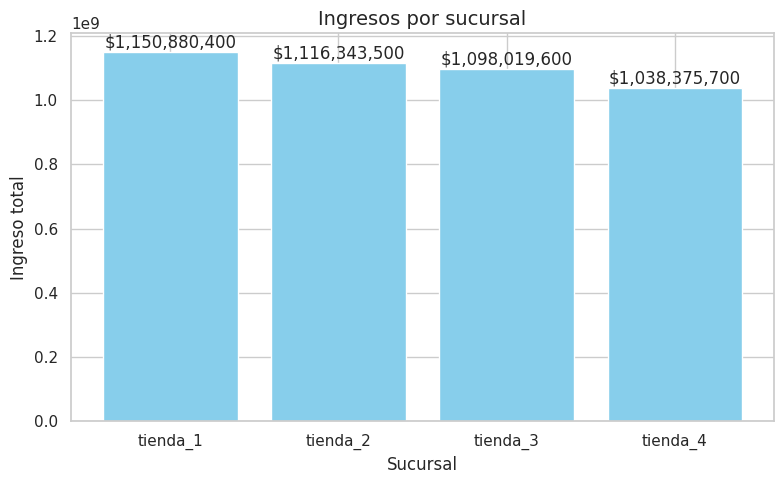

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(subtotales["sucursal"], subtotales["Precio"], color='skyblue')

plt.title("Ingresos por sucursal", fontsize=14)
plt.xlabel("Sucursal", fontsize=12)
plt.ylabel("Ingreso total", fontsize=12)
plt.xticks(rotation=0)

for i, valor in enumerate(subtotales["Precio"]):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
tienda1["sucursal"] = "tienda_1"
tienda2["sucursal"] = "tienda_2"
tienda3["sucursal"] = "tienda_3"
tienda4["sucursal"] = "tienda_4"

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

ventas_x_categoria = df_total.groupby(["sucursal", "Categoría del Producto"]).size().reset_index(name="Cantidad de ventas")
ventas_x_categoria = ventas_x_categoria.sort_values(by=["sucursal", "Cantidad de ventas"], ascending=[True, False])
print(ventas_x_categoria)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'sucursal'],
      dtype='object')
    sucursal   Categoría del Producto  Cantidad de ventas
7   tienda_1                  Muebles                 465
3   tienda_1             Electrónicos                 448
5   tienda_1                 Juguetes                 324
2   tienda_1        Electrodomésticos                 312
1   tienda_1     Deportes y diversión                 284
4   tienda_1   Instrumentos musicales                 182
6   tienda_1                   Libros                 173
0   tienda_1  Artículos para el hogar                 171
15  tienda_2                  Muebles                 442
11  tienda_2             Electrónicos                 422
13  tienda_2                 Juguetes                 313
10  tienda_2        Electrodomésticos                 305
9   

([0, 1, 2, 3],
 [Text(0, 0, 'tienda_1'),
  Text(1, 0, 'tienda_2'),
  Text(2, 0, 'tienda_3'),
  Text(3, 0, 'tienda_4')])

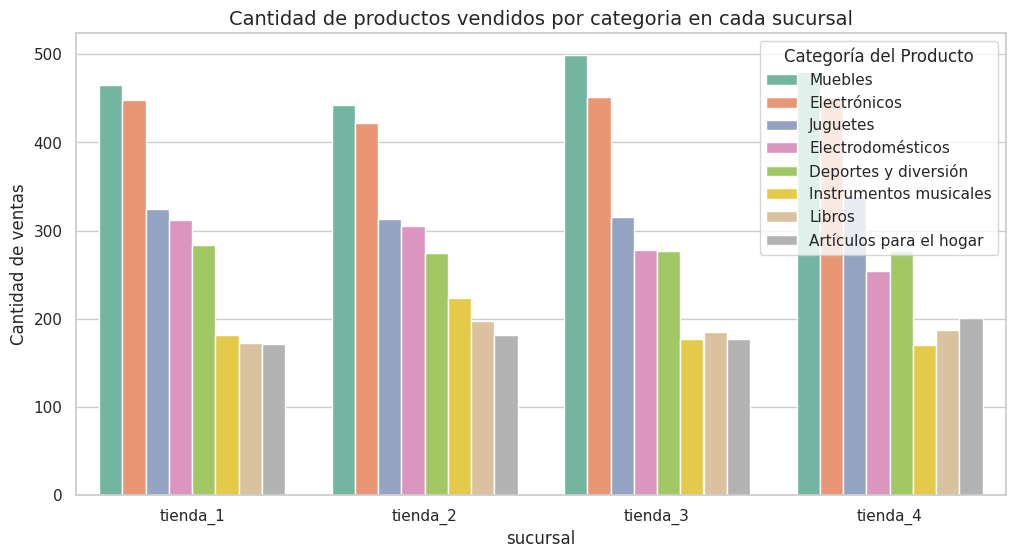

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")

plt.figure(figsize=(12,6))

sns.barplot(
            data=ventas_x_categoria,
            x="sucursal",
            y="Cantidad de ventas",
            hue="Categoría del Producto", palette="Set2")

plt.title("Cantidad de productos vendidos por categoria en cada sucursal", fontsize=14)
plt.xlabel("sucursal", fontsize=12)
plt.ylabel("Cantidad de ventas", fontsize=12)
plt.xticks(rotation=0)


# 3. Calificación promedio de la tienda


In [ ]:
tienda1["sucursal"] = "tienda_1"
tienda2["sucursal"] = "tienda_2"
tienda3["sucursal"] = "tienda_3"
tienda4["sucursal"] = "tienda_4"

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

prom_calificacion = df_total.groupby("sucursal")["Calificación"].mean().reset_index()

prom_calificacion["Calificación"] = prom_calificacion["Calificación"].round(2)
print(prom_calificacion)

   sucursal  Calificación
0  tienda_1          3.98
1  tienda_2          4.04
2  tienda_3          4.05
3  tienda_4          4.00


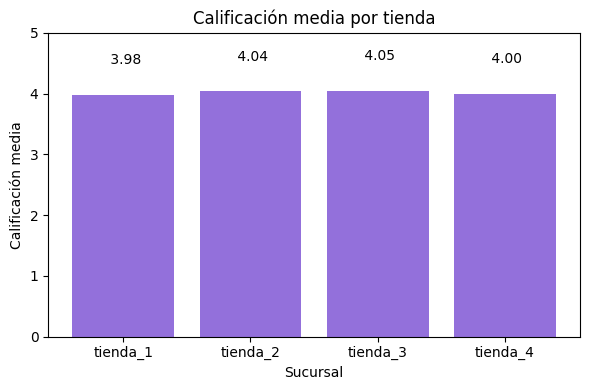

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(prom_calificacion["sucursal"], prom_calificacion["Calificación"],color= "mediumpurple")

plt.title("Calificación media por tienda")
plt.xlabel("Sucursal")
plt.ylabel("Calificación media")
plt.ylim(0,5)

for i, valor in enumerate(prom_calificacion["Calificación"]):
  plt.text(i, valor + 0.5, f" {valor:.2f}", ha= "center")

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [ ]:
ventas_x_producto = df_total.groupby(["sucursal","Producto"]).size().reset_index(name= "Cantidad de ventas")
producto_mas_vendido = ventas_x_producto.loc[ventas_x_producto.groupby("sucursal")["Cantidad de ventas"].idxmax()].reset_index(drop= True)
producto_menos_vendido = ventas_x_producto.loc[ventas_x_producto.groupby("sucursal")["Cantidad de ventas"].idxmin()].reset_index(drop= True)

print("Producto más vendido por tienda: ")
print(producto_mas_vendido)

print("Producto menos vendido por tienda: ")
print(producto_menos_vendido)


Producto más vendido por tienda: 
   sucursal                   Producto  Cantidad de ventas
0  tienda_1                    Armario                  60
1  tienda_2  Iniciando en programación                  65
2  tienda_3              Kit de bancas                  57
3  tienda_4                   Cama box                  62
Producto menos vendido por tienda: 
   sucursal                   Producto  Cantidad de ventas
0  tienda_1  Auriculares con micrófono                  33
1  tienda_2              Juego de mesa                  32
2  tienda_3    Bloques de construcción                  35
3  tienda_4         Guitarra eléctrica                  33


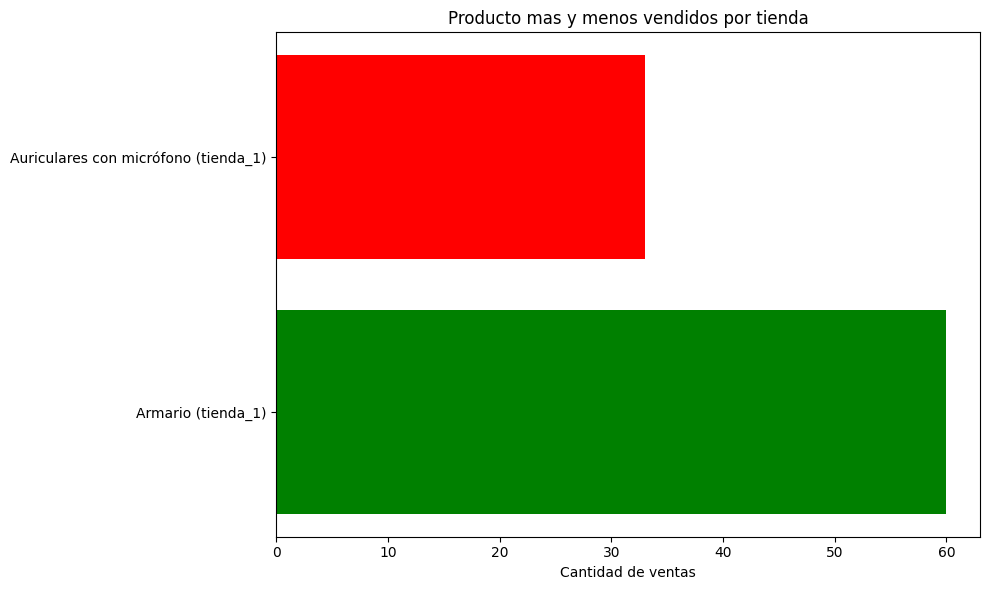

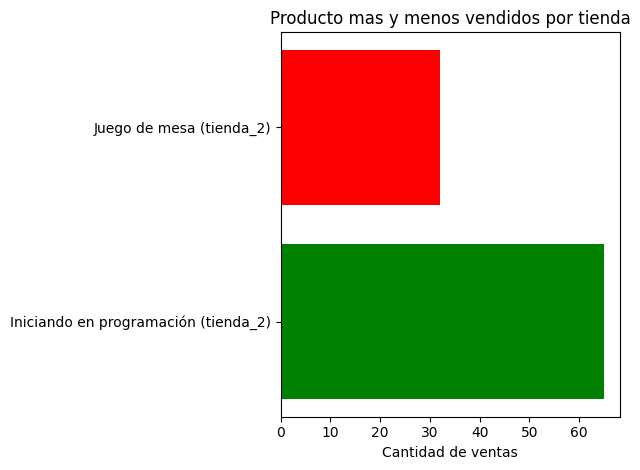

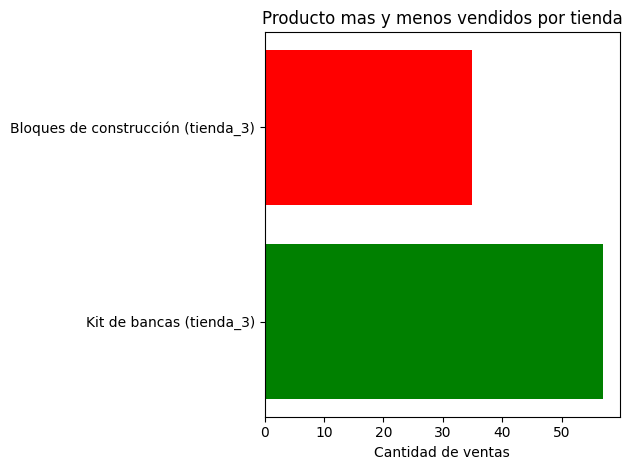

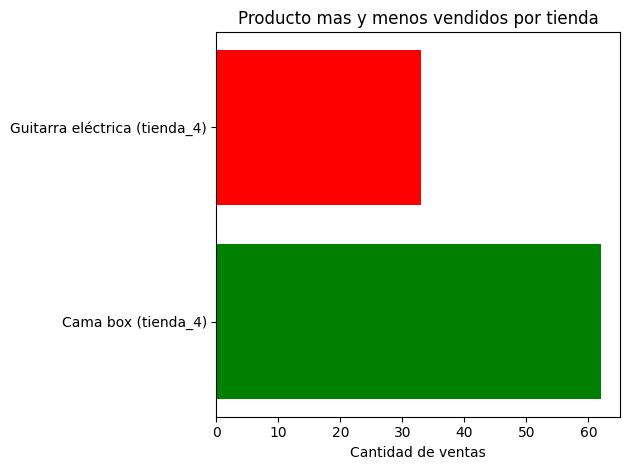

In [ ]:
import matplotlib.pyplot as plt

mas = producto_mas_vendido.copy()
mas["Tipo"] = "Mas vendido"

menos = producto_menos_vendido.copy()
menos["Tipo"] = "Menos vendido"

productos_top = pd.concat([mas, menos])

plt.figure(figsize=(10,6))
for tienda in productos_top["sucursal"].unique():
  subset = productos_top[productos_top["sucursal"] == tienda]
  plt.barh(subset["Producto"] + " ("+ tienda + ")", subset["Cantidad de ventas"],
           color=["green" if tipo == "Mas vendido" else "red" for tipo in subset["Tipo"]])

  plt.title("Producto mas y menos vendidos por tienda")
  plt.xlabel("Cantidad de ventas")
  plt.tight_layout()
  plt.show()



# 5. Envío promedio por tienda

In [ ]:
tienda1["sucursal"] = "tienda_1"
tienda2["sucursal"] = "tienda_2"
tienda3["sucursal"] = "tienda_3"
tienda4["sucursal"] = "tienda_4"

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

prom_costo_envio = df_total.groupby("sucursal")["Costo de envío"].mean().reset_index()

prom_costo_envio["Costo de envío"] = prom_costo_envio["Costo de envío"].round(2)
pd.options.display.float_format = '{:,.0f}'.format

print(prom_costo_envio)

   sucursal  Costo de envío
0  tienda_1          26,019
1  tienda_2          25,216
2  tienda_3          24,806
3  tienda_4          23,459


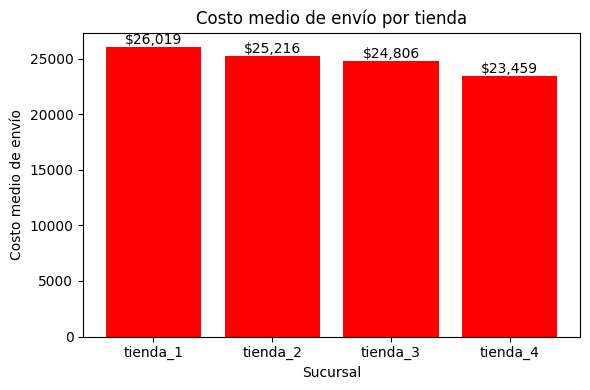

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(prom_costo_envio["sucursal"], prom_costo_envio["Costo de envío"],color= "red")

plt.title("Costo medio de envío por tienda")
plt.xlabel("Sucursal")
plt.ylabel("Costo medio de envío")

for i, valor in enumerate(prom_costo_envio["Costo de envío"]):
  plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

El objetivo principal de este análisis es ofrecerle una base fundamentada por datos que la respaldan, al Sr Juan con el fin, que él pueda tomar la decisión de cual tienda debe cerrar y con el dinero invertir en otro proyecto que le permita mejorar su nivel de rentabilidad.

Dado las diferentes gráficas y obtención de datos totalizados, se observa que la tienda que genera menos ingresos es las TIENDA N° 4, con una diferencia de alrededor de 60 millones con respecto a la tienda subsiguiente en nivel de ingresos e inferior al promedio de todas las sucursales. Además a nivel de calificación es la tercera, lo que conlleva que su calificación si bien es buena, es una de las más bajas entre las cuatro sucursales. Dado esto se considera que la TIENDA N°4 debería ser vendida y se debería optar por invertir el dinero en otro proyecto que genere más rentabilidad.

A nivel profesional como consejo al Sr Juan, en caso de no vender la tienda. se puede optar por otras estrategias que potenciaría los ingresos y mejoraría el rendimiento de la TIENDA N°4. Esto sería concentrarse en los productos y en las categorías que más ventas generan, entre las que se encuentran: muebles, electrodomésticos y juguetes y disminuiría mi stock de instrumentos musicales, libros y artículos para el hogar, aprovechando que los costos de envío no son tan altos como los de otras sucursales y que relativamente a nivel de popularidad y aceptación de los consumidores, como de costos de transporte y productos estrella su desempeño no es muy alejado de las otras sucursales. La TIENDA N°4 puede mejorarse con un liderazgo acertado que tome esta información y la transforme en políticas e iniciativas que mejoren los ingresos.
